## Analiza zbioru

### Ustawienia

In [106]:
import matplotlib.pyplot as plt
import skimage.io as io
from collections import Counter
from pathlib import Path
from pycocotools.coco import COCO
from statistics import median, mode

#### Wybór zbioru danych

In [95]:
dataDir=Path('./coco/train')
annFile = Path('./coco/train/_annotations.coco.json')

In [107]:
dataDir=Path('./coco/valid')
annFile = Path('./coco/valid/_annotations.coco.json')

### Obliczenia

In [108]:
coco = COCO(annFile)
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds[-3:])

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [109]:
len(imgIds)

2367

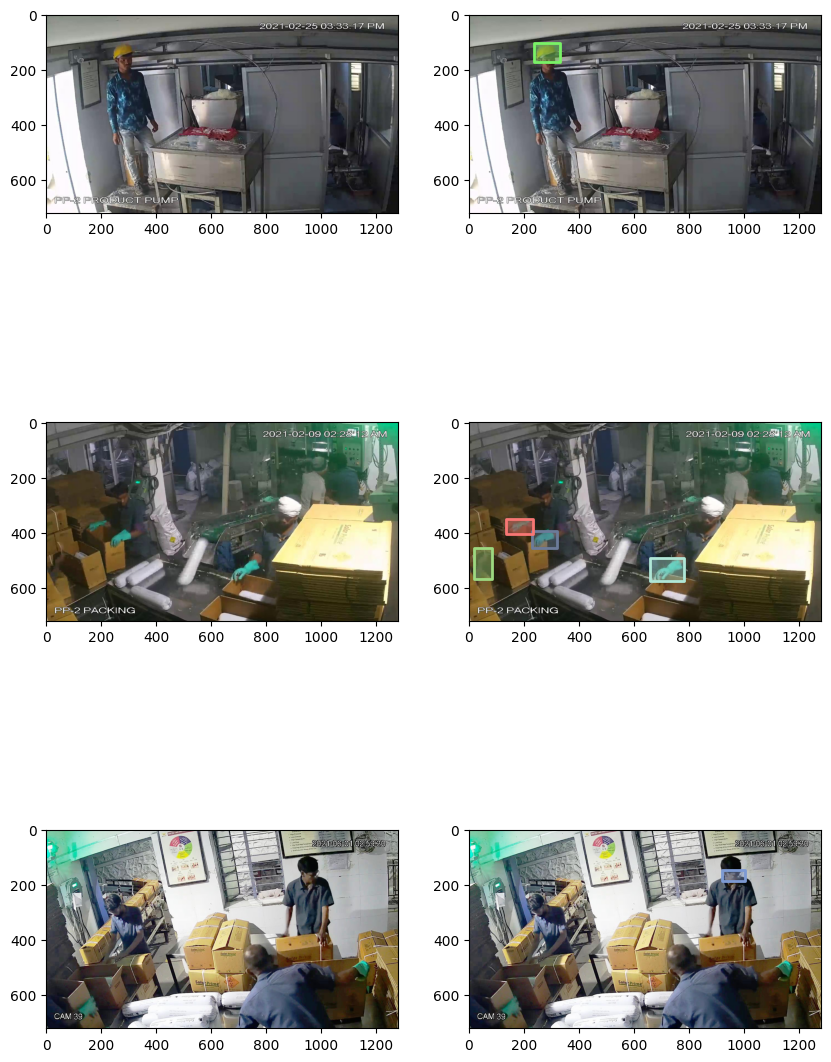

In [110]:
imgs = coco.loadImgs(imgIds[-3:])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

### Balans klas

In [111]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

COCO categories: 
ppe-equipements, glove, goggles, helmet, mask, no-suit, no_glove, no_goggles, no_helmet, no_mask, no_shoes, shoes, suit



In [112]:
for cat in cats:
    print(f'{cat["name"]}: {len(coco.getImgIds(imgIds, cat["id"]))}')

ppe-equipements: 0
glove: 430
goggles: 752
helmet: 237
mask: 58
no-suit: 13
no_glove: 559
no_goggles: 636
no_helmet: 205
no_mask: 137
no_shoes: 79
shoes: 99
suit: 18


### Rozmiar zdjęć

In [113]:
imgs = coco.loadImgs(imgIds)
img_sizes = [(img['height'], img['width']) for img in imgs]
im_ctr = Counter(img_sizes)
im_ctr

Counter({(720, 1280): 1945,
         (1536, 2048): 279,
         (1520, 2688): 93,
         (1080, 1920): 16,
         (375, 500): 4,
         (333, 500): 4,
         (333, 499): 2,
         (332, 500): 2,
         (427, 640): 1,
         (299, 450): 1,
         (334, 500): 1,
         (737, 500): 1,
         (217, 310): 1,
         (600, 455): 1,
         (306, 500): 1,
         (300, 533): 1,
         (246, 480): 1,
         (360, 480): 1,
         (281, 500): 1,
         (320, 400): 1,
         (322, 500): 1,
         (959, 640): 1,
         (300, 534): 1,
         (500, 333): 1,
         (525, 500): 1,
         (479, 500): 1,
         (300, 450): 1,
         (310, 415): 1,
         (377, 500): 1,
         (366, 500): 1})

### Ilości oznaczeń

In [114]:
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)
images_anns = []
for ann in anns:
    images_anns.append(ann['image_id'])
ctr = Counter(images_anns)
ann_ctr = Counter(ctr.values())
ann_ctr

Counter({1: 1200, 2: 517, 3: 258, 4: 206, 5: 93, 6: 68, 7: 20, 8: 3, 10: 2})

### Rozmieszczenia i wielkości oznaczeń

In [115]:
def size(box):
    return box[2]*box[3]

In [116]:
crowded = 0
for ann in anns:
    if ann['iscrowd'] != 0:
        crowded += 1
print(f'Crowded pictures: {crowded}')

for cat in cats[1::]:
    anns = coco.loadAnns(coco.getAnnIds(catIds=[cat['id']]))
    ann_calcs = [size(ann['bbox']) for ann in anns]
    print(f'category: {cat["name"]}, average size: {sum(ann_calcs)/len(ann_calcs)}, mode: {mode(ann_calcs)}, median: {median(ann_calcs)}, minimum: {min(ann_calcs)}, maximum: {max(ann_calcs)}')
    del(ann_calcs)

Crowded pictures: 0
category: glove, average size: 12489.135699373695, mode: 15960, median: 12141.0, minimum: 2310, maximum: 29468
category: goggles, average size: 4530.549210206561, mode: 2800, median: 3003, minimum: 1242, maximum: 61588
category: helmet, average size: 7383.544169611308, mode: 616, median: 7650, minimum: 208, maximum: 36540
category: mask, average size: 6669.0344827586205, mode: 5775, median: 5892.0, minimum: 2254, maximum: 22176
category: no-suit, average size: 153345.8, mode: 190708, median: 190708, minimum: 43848, maximum: 220460
category: no_glove, average size: 10552.14907332796, mode: 7750, median: 8835, minimum: 2016, maximum: 71912
category: no_goggles, average size: 4715.2891113892365, mode: 25724, median: 2775, minimum: 864, maximum: 27485
category: no_helmet, average size: 8146.144104803493, mode: 6536, median: 7656, minimum: 306, maximum: 26730
category: no_mask, average size: 12451.401459854014, mode: 3850, median: 3850, minimum: 1785, maximum: 52542
cate

## Opis wyników

### Zbiór treningowy

#### Reprezentacja graficzna

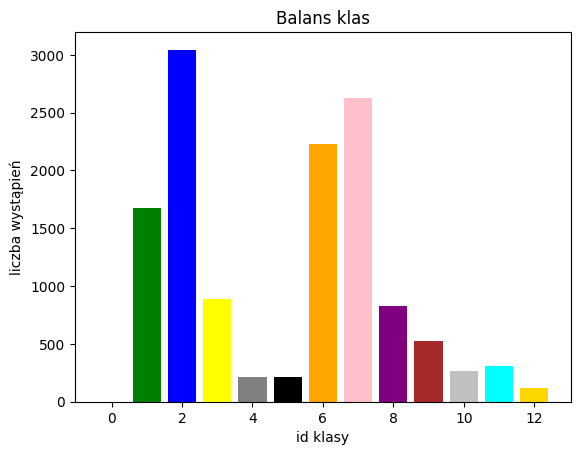

In [39]:
xs = [cat['id'] for cat in cats]
ys = [len(coco.getImgIds(imgIds, cat["id"])) for cat in cats]

plt.bar(xs, ys, color=['blue', 'green', 'blue', 'yellow', 'grey', 'black', 'orange', 'pink', 'purple', 'brown', 'silver', 'cyan', 'gold'])
plt.title('Balans klas')
plt.xlabel('id klasy')
plt.ylabel('liczba wystąpień')
plt.show()

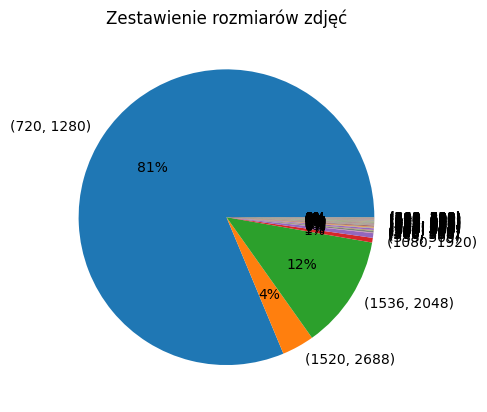

In [33]:
xs = [i for i in list(im_ctr.keys())]
ys = im_ctr.values()

plt.pie(ys, labels=xs, autopct='%1.0f%%')
plt.title('Zestawienie rozmiarów zdjęć')
plt.show()

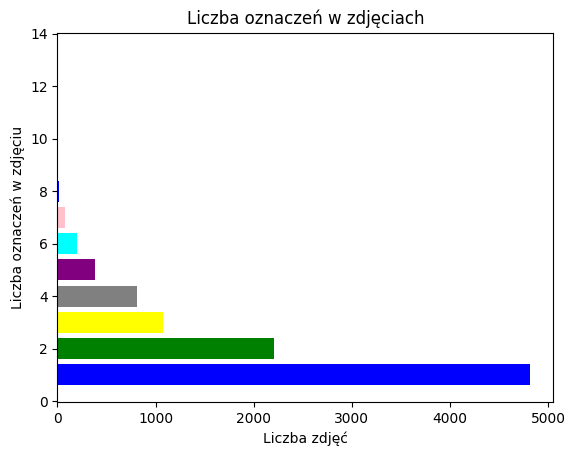

In [54]:
xs = list(ann_ctr.keys())
ys = list(ann_ctr.values())

plt.barh(xs, ys, color=['blue', 'green', 'yellow', 'grey', 'pink', 'purple', 'cyan', 'gold'])
plt.title('Liczba oznaczeń w zdjęciach')
plt.xlabel('Liczba zdjęć')
plt.ylabel('Liczba oznaczeń w zdjęciu')
plt.show()

In [74]:
def draw(vals):
    return str(round(vals))

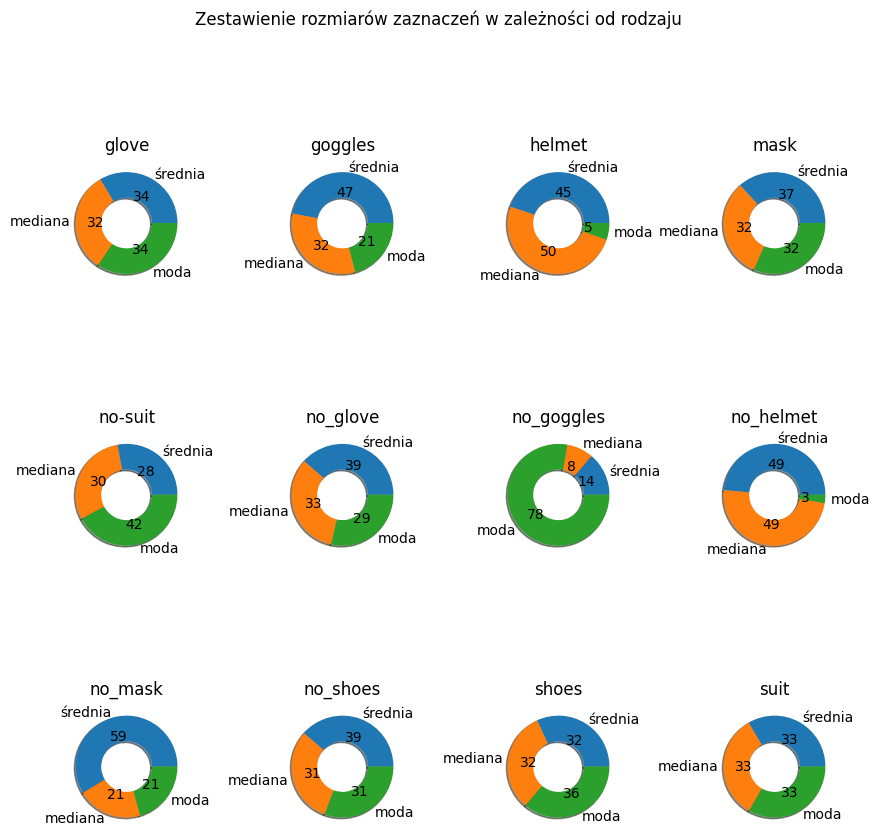

In [105]:
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
for i, cat in enumerate(cats[1::]):
    ax = axes[i//4, i % 4]
    
    anns = coco.loadAnns(coco.getAnnIds(catIds=[cat['id']]))
    ann_calcs = [size(ann['bbox']) for ann in anns]
    vals = [round(sum(ann_calcs)/len(ann_calcs)), median(ann_calcs), mode(ann_calcs)]
    ax.pie(vals,
           labels=['średnia', 'mediana', 'moda'],
           wedgeprops=dict(width=.5),
           autopct=draw,
           shadow=True)
    ax.set_title(cat['name'], color='black')
    del(ann_calcs)

fig.subplots_adjust(wspace=.7)
fig.suptitle('Zestawienie rozmiarów zaznaczeń w zależności od rodzaju')
plt.show()

#### Analiza słowna

* Balans klas: po wykresie wyraźnie widać, że klasy są niezbalansowane, dodatkowo niektóre klasy mają bardzo mało przykładów, co razem może skutkować słabym lub zerowym wyczuleniem modelu na słabiej zreprezentowane klasy
* Zestawienie rozmiarów zdjęć: zestawienie rozmiarów zdjęć nie powinno spowodować zakłóceń w procesie nauczania, jest jeden wyróżniony rozmiar będący głównym źródłem nauki oraz duża liczba losowych rozmiarów, co może pomóc osłabić zbyt dużą pewność siebie modelu
* Liczba oznaczeń w zdjęciach: pomimo dużej dysproporcji w możliwej liczbie oznaczeń w danym zdjęciu, większość zdjęć posiada małą liczbę oznaczeń pozwalającą modelowi dobrze zapamiętać kategorie, pozostałe zdjęcia będą dobrym urozmaiceniem zbioru danych, liczba oznaczeń nie powinna stanowić problemu w procesie nauczania
* Rozmieszczenie zaznaczeń: podczas obliczeń nie wykryto kolizji zaznaczeń, rozmieszczenie zaznaczeń nie powinno wywołać problemów w procesie nauczania
* Wielkość zaznaczeń: dla większości kategorii różnica między wielkością zaznaczeń jest znikoma i akceptowalna, w pozostałych kategoriach pomimo dużej różnicy pomiędzy modą a średnią i medianą, wciąż jest zachowana proporcja między średnią i medianą, co wskazuje na ugruntowany rozkład wielkości, wielkości zaznaczeń nie powinny wywołać problemów podczas procesu nauczania

### Zbiór walidacyjny

#### Reprezentacja graficzna

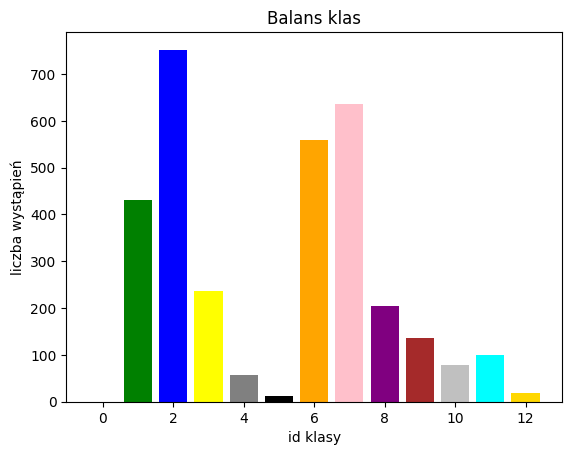

In [88]:
xs = [cat['id'] for cat in cats]
ys = [len(coco.getImgIds(imgIds, cat["id"])) for cat in cats]

plt.bar(xs, ys, color=['blue', 'green', 'blue', 'yellow', 'grey', 'black', 'orange', 'pink', 'purple', 'brown', 'silver', 'cyan', 'gold'])
plt.title('Balans klas')
plt.xlabel('id klasy')
plt.ylabel('liczba wystąpień')
plt.show()

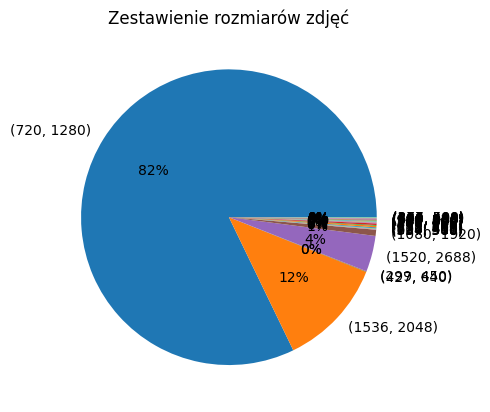

In [89]:
xs = [i for i in list(im_ctr.keys())]
ys = im_ctr.values()

plt.pie(ys, labels=xs, autopct='%1.0f%%')
plt.title('Zestawienie rozmiarów zdjęć')
plt.show()

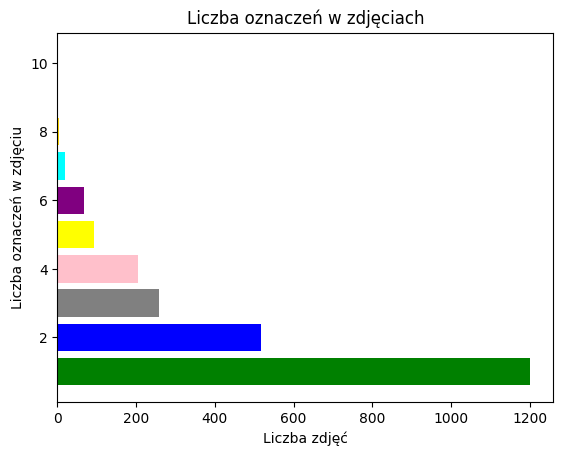

In [90]:
xs = list(ann_ctr.keys())
ys = list(ann_ctr.values())

plt.barh(xs, ys, color=['blue', 'green', 'yellow', 'grey', 'pink', 'purple', 'cyan', 'gold'])
plt.title('Liczba oznaczeń w zdjęciach')
plt.xlabel('Liczba zdjęć')
plt.ylabel('Liczba oznaczeń w zdjęciu')
plt.show()

In [91]:
def draw(vals):
    return str(round(vals))

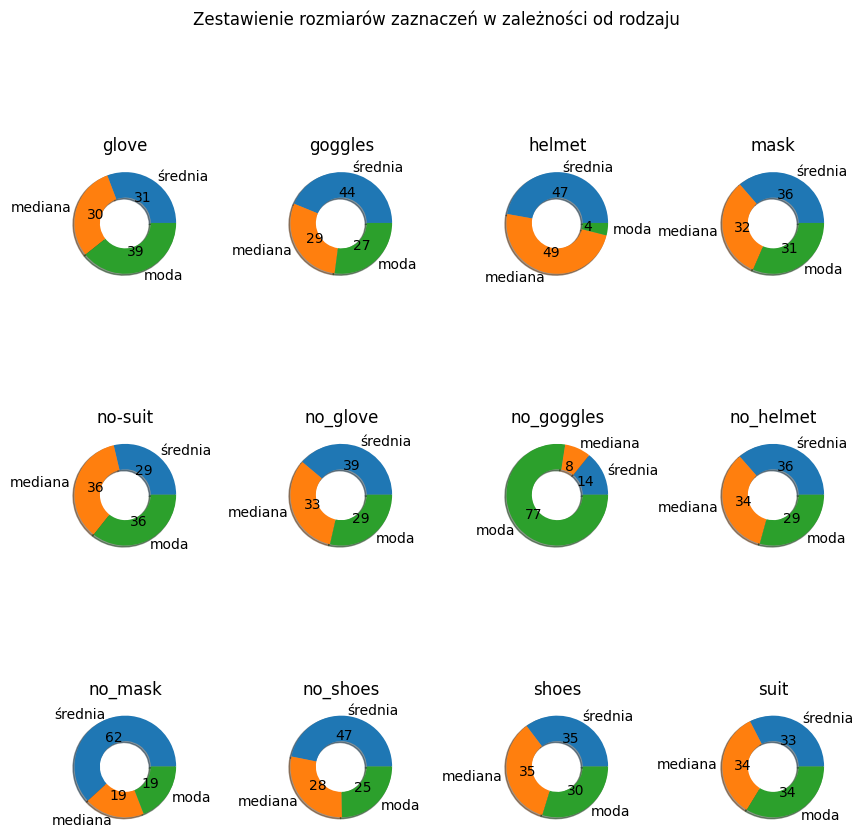

In [93]:
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
for i, cat in enumerate(cats[1::]):
    ax = axes[i//4, i % 4]
    
    anns = coco.loadAnns(coco.getAnnIds(catIds=[cat['id']]))
    ann_calcs = [size(ann['bbox']) for ann in anns]
    vals = [round(sum(ann_calcs)/len(ann_calcs)), median(ann_calcs), mode(ann_calcs)]
    ax.pie(vals,
           labels=['średnia', 'mediana', 'moda'],
           wedgeprops=dict(width=.5),
           autopct=draw,
           shadow=True)
    ax.set_title(cat['name'], color='black')
    del(ann_calcs)

fig.subplots_adjust(wspace=.7)
fig.suptitle('Zestawienie rozmiarów zaznaczeń w zależności od rodzaju')
plt.show()

#### Analiza słowna

* Balans klas: po wykresie wyraźnie widać, że klasy są niezbalansowane, dodatkowo niektóre klasy mają bardzo mało przykładów, co razem może skutkować słabym lub zerowym wyczuleniem modelu na słabiej zreprezentowane klasy
* Zestawienie rozmiarów zdjęć: zestawienie rozmiarów zdjęć nie powinno spowodować zakłóceń w procesie nauczania, jest jeden wyróżniony rozmiar będący głównym źródłem nauki oraz duża liczba losowych rozmiarów, co może pomóc osłabić zbyt dużą pewność siebie modelu
* Liczba oznaczeń w zdjęciach: pomimo dużej dysproporcji w możliwej liczbie oznaczeń w danym zdjęciu, większość zdjęć posiada małą liczbę oznaczeń pozwalającą modelowi dobrze zapamiętać kategorie, pozostałe zdjęcia będą dobrym urozmaiceniem zbioru danych, liczba oznaczeń nie powinna stanowić problemu w procesie walidacji
* Rozmieszczenie zaznaczeń: podczas obliczeń nie wykryto kolizji zaznaczeń, rozmieszczenie zaznaczeń nie powinno wywołać problemów w procesie walidacji
* Wielkość zaznaczeń: dla większości kategorii różnica między wielkością zaznaczeń jest znikoma i akceptowalna, w jednej kategorii pomimo dużej różnicy pomiędzy modą a średnią i medianą, wciąż jest zachowana proporcja między średnią i medianą, w innej kategorii pomimo dużej różnicy pomiędzy średnią a modą i medianą, wciąż jest zachowana proporcja pomiędzy modą i medianą, co wskazuje na ugruntowany rozkład wielkości, wielkości zaznaczeń nie powinny wywołać problemów podczas procesu walidacji

### Wnioski

Głównym i jedynym problemem naszego zbioru danych jest balans klas, gdzie różnica w reprezentacji klas jest zbyt duża, żeby model mógł poprawnie wyuczyć się każdej klasy. Dodatkowo wiele klas ma bardzo niską liczbę wystąpień, co zwiększa ryzyko niedouczenia się pewnych klas. Ryzyko niedouczenia się pewnych klas i przeuczenia się innych klas jest zbyt wysokie, w związku z tym nasz zbiór danych w aktualnym stanie nie nadaje sie do trenowania modelu. Zalecana jest augmentacja danych w celu zwiększenia liczby występowań klas niedostatecznie reprezentowanych na przykład dodając do zbioru danych rotacje lub przybliżenia/oddalenia zdjęć z niedostatecznie reprezentowanymi klasami.